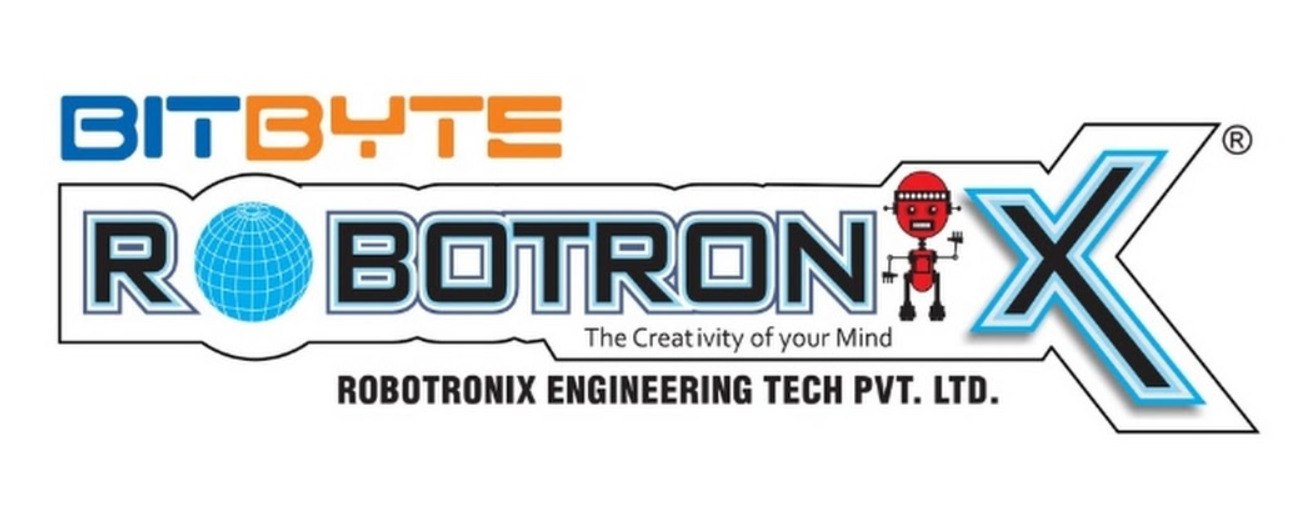

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
Plcmnt = pd.read_csv('Placement_Data_Full_Class.csv')

In [ ]:
median_salary = Plcmnt['salary'].median()

In [ ]:
Plcmnt['salary'] = Plcmnt.salary.fillna(median_salary)

In [ ]:
work = Plcmnt.workex.map({'Yes':1,'No':0})
spe = Plcmnt.specialisation.map({'Mkt&Fin':1,'Mkt&HR':0})
stat = Plcmnt.status.map({'Placed':1,'Not Placed':0})
Dssc_b = Plcmnt.ssc_b.map({'Others':0,'Central':1})
Dhsc_s = Plcmnt.hsc_s.map({'Commerce':0,'Science':2,'Arts':1})
degree = Plcmnt.degree_t.map({'Others':0,'Sci&Tech':2,'Comm&Mgmt':1})
sex = Plcmnt.gender.map({'M':1,'F':0})
Dhsc_b = Plcmnt.hsc_b.map({'Others':0,'Central':1})
Plc = pd.concat((sex,Dssc_b,Dhsc_b,Dhsc_s,degree,work,spe,stat),axis=1)
Placement = pd.concat((Plcmnt.drop(['gender','ssc_b','hsc_b','hsc_s','degree_t','workex','specialisation','status'],axis=1),Plc),axis=1)
Placement.drop(['sl_no'],inplace=True,axis=1)

In [ ]:
Placement.head()

ssc_p  hsc_p  degree_p  etest_p  ...  degree_t  workex  specialisation  status
0  67.00  91.00     58.00     55.0  ...         2       0               0       1
1  79.33  78.33     77.48     86.5  ...         2       1               1       1
2  65.00  68.00     64.00     75.0  ...         1       0               1       1
3  56.00  52.00     52.00     66.0  ...         2       0               0       0
4  85.80  73.60     73.30     96.8  ...         1       0               1       1

[5 rows x 14 columns]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = Placement.drop(['salary','status'],axis=1)
y = Placement['status']

In [ ]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3,random_state=50)

In [ ]:
 yS = Placement['salary']
 x_train,x_test,y_train,y_test = train_test_split(x,yS,test_size=0.3,random_state=50)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
logmodelStatus = LogisticRegression()
logmodelSalary = LogisticRegression()

In [ ]:
Placement.head()

ssc_p  hsc_p  degree_p  etest_p  ...  degree_t  workex  specialisation  status
0  67.00  91.00     58.00     55.0  ...         2       0               0       1
1  79.33  78.33     77.48     86.5  ...         2       1               1       1
2  65.00  68.00     64.00     75.0  ...         1       0               1       1
3  56.00  52.00     52.00     66.0  ...         2       0               0       0
4  85.80  73.60     73.30     96.8  ...         1       0               1       1

[5 rows x 14 columns]

In [ ]:
logmodelStatus.fit(xtrain,ytrain)
logmodelSalary.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
import gradio as gr
import datetime 

In [ ]:
def predictStatus(name,ssc_p,hsc_p,degree_p,etest_p,mba_p,gender,ssc_b,hsc_b,hsc_s,degree_t,workex,sp):
  
  df = {'ssc_p':ssc_p,'hsc_p':hsc_p,'degree_p':degree_p,'etest_p':etest_p,'mba_p':mba_p,'gender':gender,'ssc_b':ssc_b,'hsc_b':hsc_b,'hsc_s':hsc_s,'degree_t':degree_t,'workex':workex,'sp':sp}
  con_df = pd.DataFrame(df,index=[1])
  
  pred = logmodelStatus.predict_proba(con_df)
  predS = logmodelSalary.predict(con_df)
  
  notplaced = int(pred[:,0]*100)
  placed = int(pred[:,1]*100)

  # if notplaced>placed:
  #   return f"Sorry {name} you are not selected."

  # else:
  #   return f"Dear {name}, \nCongratulation! You have been selected for the job and you salary will be {str(predS[0])} INR anually.!"
  timehour = int(datetime.datetime.now().hour)
  if gender==0:
    if timehour>=0 and timehour<12:
      if notplaced>placed:
        return f"Good Morning Miss {name} sorry to say that you are not selected."
      else:
        return f"Good Morning Miss {name}, \nCongratulation! You have been selected for the job and your salary will be {str(predS[0])} INR anually.!"

    elif timehour>=12 and timehour<15:
      if notplaced>placed:
        return f"Good Afternoon Miss {name} sorry to say that you are not selected."
      else:
        return f"Good Afternoon Miss {name}, \nCongratulation! You have been selected for the job and your salary will be {str(predS[0])} INR anually.!"

    else:
      if notplaced>placed:
        return f"Good Evening Miss {name} sorry to say that you are not selected."
      else:
        return f"Good Evening Miss {name}, \nCongratulation! You have been selected for the job and your salary will be {str(predS[0])} INR anually.!"
  
  else:
    if timehour>=0 and timehour<12:
      if notplaced>placed:
        return f"Good Morning Mr {name} sorry to say that you are not selected."
      else:
        return f"Good Morning Mr {name}, \nCongratulation! You have been selected for the job and your salary will be {str(predS[0])} INR anually.!"

    elif timehour>=12 and timehour<15:
      if notplaced>placed:
        return f"Good Afternoon Mr {name} sorry to say that you are not selected."
      else:
        return f"Good Afternoon Mr {name}, \nCongratulation! You have been selected for the job and you salary will be {str(predS[0])} INR anually.!"

    else:
      if notplaced>placed:
        return f"Good Evening Mr {name} sorry to say that you are not selected."
      else:
        return f"Good Evening Mr {name}, \nCongratulation! You have been selected for the job and you salary will be {str(predS[0])} INR anually.!"


stuname = gr.inputs.Textbox(lines=2,placeholder='Adams Jhonson',label='Enter Your Name')
sex = gr.inputs.Radio(['Female','Male'],label='Gender',type='index')
wrkex = gr.inputs.Radio(['No','Yes'],label='Work Experience',type='index')
spelization = gr.inputs.Radio(['Mkt&HR','Mkt&Fin'],label='Specialisation',type='index')
secndrybrd = gr.inputs.Radio(['Others','Central'],label='Secondary Education Board',type='index')
hisecndrybrd = gr.inputs.Radio(['Others','Central'],label='Higher Secondary Education Board',type='index')
hispe = gr.inputs.Dropdown(['Commerce','Arts','Science'],label='Specialization in Higher Secondary Education',type='index')
ugdegree = gr.inputs.Dropdown(['Others','Comm&Mgmt','Sci&Tech'],label='Field of degree education in UG',type='index')

secndryperc = gr.inputs.Slider(minimum=0,maximum=100,step=0.1,default=60,label='Secondary Education percentage- 10th Grade')
hisecndryperc = gr.inputs.Slider(minimum=0,maximum=100,step=0.1,default=60,label='Higher Secondary Education percentage- 12th Grade')
degreeperc = gr.inputs.Slider(minimum=0,maximum=100,step=0.1,default=60,label='Degree Percentage')
etestperc = gr.inputs.Slider(minimum=0,maximum=100,step=0.1,default=70,label='Employability test percentage')
mbaperc = gr.inputs.Slider(minimum=0,maximum=100,step=0.1,default=60,label='MBA percentage')

out = gr.outputs.Label(label='Status Predictor')

gr.Interface(predictStatus,[stuname,secndryperc,hisecndryperc,degreeperc,etestperc,mbaperc,sex,secndrybrd,hisecndrybrd,hispe,ugdegree,wrkex,spelization],out,allow_screenshot=False,title='Campuss Recruitment',allow_flagging=False).launch()

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on External URL: https://52754.gradio.app
Interface loading below...


(<gradio.networking.serve_files_in_background.<locals>.HTTPServer at 0x7f3feddcbe80>,
 'http://127.0.0.1:7861/',
 'https://52754.gradio.app')